In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
coordinates

[(33.590189876009646, 152.5140096896019),
 (-70.26757086734924, -165.2603426931039),
 (20.405394521916094, 126.70225606573177),
 (-60.916761313276034, -83.72194965171526),
 (53.187128392448784, -4.760031714058982),
 (-17.626155361712676, -119.15207274927593),
 (89.64889165698011, -99.06659398055318),
 (-32.54740000397907, -138.1946567122655),
 (52.602312261520154, -155.08578213496503),
 (57.52381604296005, -54.31809274614358),
 (-68.1512648178637, 118.93431376374963),
 (31.807344610753958, -173.07095195713296),
 (-12.982063884187951, 111.72217608208041),
 (-88.5593916799601, 14.221934152785565),
 (16.378114605498197, 82.32186830608538),
 (18.929667237846516, -42.56138297969369),
 (10.114194116670404, 46.88469479047967),
 (-5.006840774072089, -78.01050308268934),
 (76.09973362063957, 5.272746571817066),
 (-1.2112839574540288, 162.46850021218955),
 (10.577919561481721, 2.8515420813086507),
 (-77.86482173613686, 43.7727259202656),
 (66.50510263197023, -178.7356840584625),
 (11.24579698723

# Display coordinates in for loop

In [20]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

33.590189876009646 152.5140096896019
-70.26757086734924 -165.2603426931039
20.405394521916094 126.70225606573177
-60.916761313276034 -83.72194965171526
53.187128392448784 -4.760031714058982
-17.626155361712676 -119.15207274927593
89.64889165698011 -99.06659398055318
-32.54740000397907 -138.1946567122655
52.602312261520154 -155.08578213496503
57.52381604296005 -54.31809274614358
-68.1512648178637 118.93431376374963
31.807344610753958 -173.07095195713296
-12.982063884187951 111.72217608208041
-88.5593916799601 14.221934152785565
16.378114605498197 82.32186830608538
18.929667237846516 -42.56138297969369
10.114194116670404 46.88469479047967
-5.006840774072089 -78.01050308268934
76.09973362063957 5.272746571817066
-1.2112839574540288 162.46850021218955
10.577919561481721 2.8515420813086507
-77.86482173613686 43.7727259202656
66.50510263197023 -178.7356840584625
11.245796987233277 -74.19825471638035
-41.99839397991107 108.0149909561348
67.18772034323172 -43.804519609676845
-39.57828963483884

# Map Nearest city to coordinates

In [21]:
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

# Make Request for Data to an API

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ef41da726500c6f691a33dccaeb7ff7


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [28]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 2 | hasaki
Processing Record 2 of Set 2 | avarua
Processing Record 3 of Set 2 | hirara
Processing Record 4 of Set 2 | punta arenas
Processing Record 5 of Set 2 | llangefni
Processing Record 6 of Set 2 | rikitea
Processing Record 7 of Set 2 | yellowknife
Processing Record 8 of Set 2 | kodiak
Processing Record 9 of Set 2 | saint anthony
Processing Record 10 of Set 2 | albany
Processing Record 11 of Set 2 | kapaa
Processing Record 12 of Set 2 | boyolangu
Processing Record 13 of Set 2 | bredasdorp
Processing Record 14 of Set 2 | amalapuram
Processing Record 15 of Set 2 | cayenne
Processing Record 16 of Set 2 | berbera
Processing Record 17 of Set 2 | la peca
Processing Record 18 of Set 2 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 2 | buala
Processing Record 20 of Set 2 | bembereke
Processing Record 21 of Set 2 | port alfred
Processing Record 22 of Set 2 | egvekinot
Processing Record 23 of Set 2 | santa marta
Processing Record 24 of Set 2

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,77.40,81,99,6.24,JP,2022-07-20 15:53:30
1,Avarua,-21.2078,-159.7750,73.45,64,40,13.80,CK,2022-07-20 15:53:31
2,Hirara,24.8000,125.2833,84.85,83,5,12.10,JP,2022-07-20 15:53:31
3,Punta Arenas,-53.1500,-70.9167,35.62,86,75,29.93,CL,2022-07-20 15:43:14
4,Llangefni,53.2556,-4.3106,66.11,63,20,12.66,GB,2022-07-20 15:53:32
5,Rikitea,-23.1203,-134.9692,72.97,76,3,1.92,PF,2022-07-20 15:50:00
6,Yellowknife,62.4560,-114.3525,61.32,72,100,11.50,CA,2022-07-20 15:50:07
7,Kodiak,57.7900,-152.4072,51.31,82,20,4.61,US,2022-07-20 15:45:04
8,Saint Anthony,45.0205,-93.2180,82.02,58,40,20.71,US,2022-07-20 15:53:32
9,Albany,42.6001,-73.9662,89.78,61,7,5.59,US,2022-07-20 15:40:36


In [30]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-20 15:53:30,35.7333,140.8333,77.40,81,99,6.24
1,Avarua,CK,2022-07-20 15:53:31,-21.2078,-159.7750,73.45,64,40,13.80
2,Hirara,JP,2022-07-20 15:53:31,24.8000,125.2833,84.85,83,5,12.10
3,Punta Arenas,CL,2022-07-20 15:43:14,-53.1500,-70.9167,35.62,86,75,29.93
4,Llangefni,GB,2022-07-20 15:53:32,53.2556,-4.3106,66.11,63,20,12.66
5,Rikitea,PF,2022-07-20 15:50:00,-23.1203,-134.9692,72.97,76,3,1.92
6,Yellowknife,CA,2022-07-20 15:50:07,62.4560,-114.3525,61.32,72,100,11.50
7,Kodiak,US,2022-07-20 15:45:04,57.7900,-152.4072,51.31,82,20,4.61
8,Saint Anthony,US,2022-07-20 15:53:32,45.0205,-93.2180,82.02,58,40,20.71
9,Albany,US,2022-07-20 15:40:36,42.6001,-73.9662,89.78,61,7,5.59


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

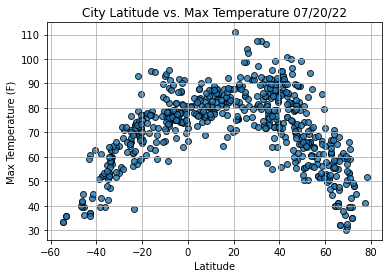

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

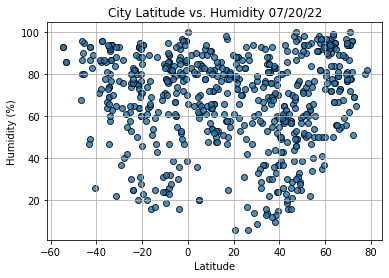

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

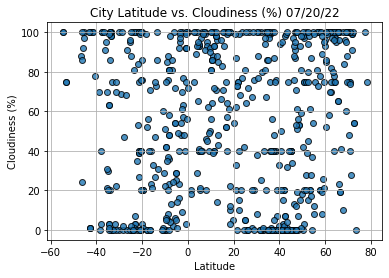

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

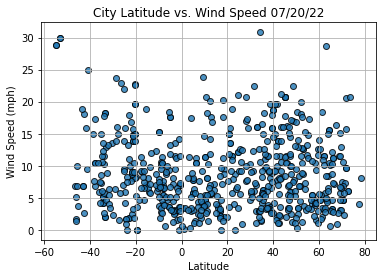

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13

City                   Amalapuram
Country                        IN
Date          2022-07-20 15:53:33
Lat                       16.5833
Lng                       82.0167
Max Temp                    82.11
Humidity                       82
Cloudiness                     52
Wind Speed                   3.02
Name: 13, dtype: object

In [40]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
620     True
621    False
622     True
623    False
624    False
Name: Lat, Length: 625, dtype: bool

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-20 15:53:30,35.7333,140.8333,77.40,81,99,6.24
2,Hirara,JP,2022-07-20 15:53:31,24.8000,125.2833,84.85,83,5,12.10
4,Llangefni,GB,2022-07-20 15:53:32,53.2556,-4.3106,66.11,63,20,12.66
6,Yellowknife,CA,2022-07-20 15:50:07,62.4560,-114.3525,61.32,72,100,11.50
7,Kodiak,US,2022-07-20 15:45:04,57.7900,-152.4072,51.31,82,20,4.61
...,...,...,...,...,...,...,...,...,...
616,Najran,SA,2022-07-20 16:09:41,17.4924,44.1277,88.07,25,100,7.11
617,Porto Novo,BJ,2022-07-20 16:05:31,6.4965,2.6036,78.94,63,99,10.49
618,Agadir,MA,2022-07-20 16:09:41,30.4202,-9.5982,97.25,33,77,9.01
620,Polyarnyy,RU,2022-07-20 16:09:42,69.1989,33.4478,60.17,80,100,6.71


In [42]:
city_data_df.loc[(city_data_df["Lat"] <= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Avarua,CK,2022-07-20 15:53:31,-21.2078,-159.7750,73.45,64,40,13.80
3,Punta Arenas,CL,2022-07-20 15:43:14,-53.1500,-70.9167,35.62,86,75,29.93
5,Rikitea,PF,2022-07-20 15:50:00,-23.1203,-134.9692,72.97,76,3,1.92
11,Boyolangu,ID,2022-07-20 15:53:33,-8.1181,111.8935,73.83,86,81,5.44
12,Bredasdorp,ZA,2022-07-20 15:50:04,-34.5322,20.0403,52.14,74,63,4.12
...,...,...,...,...,...,...,...,...,...
609,Fare,PF,2022-07-20 16:09:39,-16.7000,-151.0167,77.14,66,0,8.25
619,Mount Isa,AU,2022-07-20 16:09:42,-20.7333,139.5000,58.77,31,0,10.36
621,Kasongo,CD,2022-07-20 16:09:42,-4.4500,26.6667,86.49,30,49,3.18
623,Victor Harbor,AU,2022-07-20 16:09:43,-35.5667,138.6167,48.00,81,70,7.47


In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-20 15:53:30,35.7333,140.8333,77.40,81,99,6.24
2,Hirara,JP,2022-07-20 15:53:31,24.8000,125.2833,84.85,83,5,12.10
4,Llangefni,GB,2022-07-20 15:53:32,53.2556,-4.3106,66.11,63,20,12.66
6,Yellowknife,CA,2022-07-20 15:50:07,62.4560,-114.3525,61.32,72,100,11.50
7,Kodiak,US,2022-07-20 15:45:04,57.7900,-152.4072,51.31,82,20,4.61


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [45]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-20 15:53:30,35.7333,140.8333,77.40,81,99,6.24
2,Hirara,JP,2022-07-20 15:53:31,24.8000,125.2833,84.85,83,5,12.10
4,Llangefni,GB,2022-07-20 15:53:32,53.2556,-4.3106,66.11,63,20,12.66
6,Yellowknife,CA,2022-07-20 15:50:07,62.4560,-114.3525,61.32,72,100,11.50
7,Kodiak,US,2022-07-20 15:45:04,57.7900,-152.4072,51.31,82,20,4.61


In [46]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Avarua,CK,2022-07-20 15:53:31,-21.2078,-159.7750,73.45,64,40,13.80
3,Punta Arenas,CL,2022-07-20 15:43:14,-53.1500,-70.9167,35.62,86,75,29.93
5,Rikitea,PF,2022-07-20 15:50:00,-23.1203,-134.9692,72.97,76,3,1.92
11,Boyolangu,ID,2022-07-20 15:53:33,-8.1181,111.8935,73.83,86,81,5.44
12,Bredasdorp,ZA,2022-07-20 15:50:04,-34.5322,20.0403,52.14,74,63,4.12


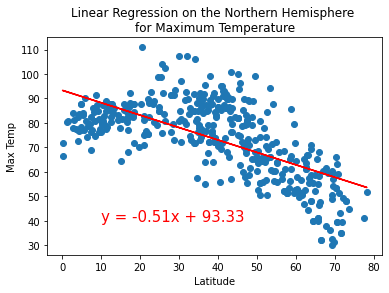

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

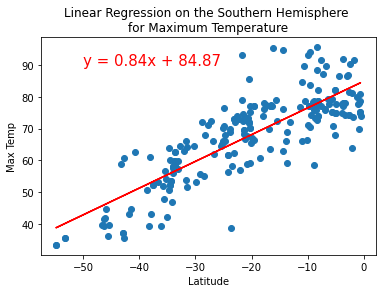

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

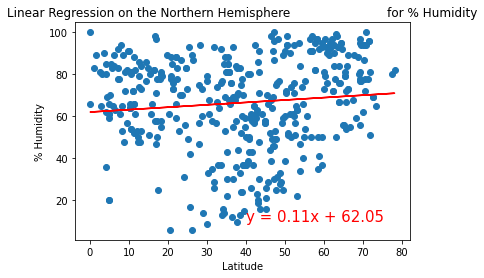

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

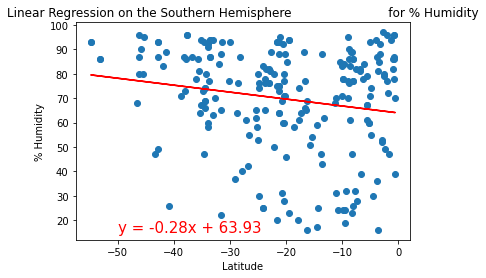

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

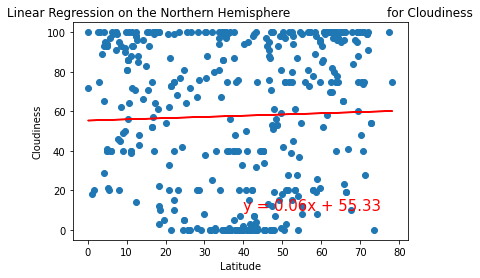

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

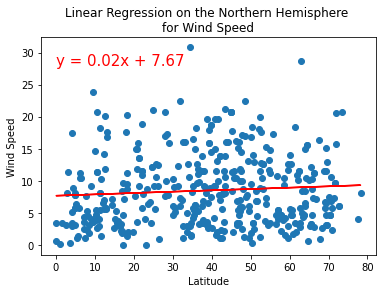

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,28))

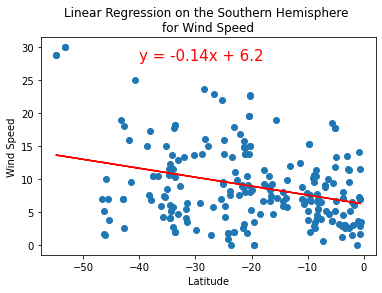

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-40,28))